In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class leaf():
    def __init__(self, bbox=np.array([[-1, 1],[-1, 1]]), depth=1):
        # if the leaf has a particle ... 
        self.particle = None 
        # center position of quadrant 
        self.center = np.array([bbox[0].sum() / 2, bbox[1].sum() / 2])
        # length of bounding box, same for x- and y- axes 
        self.length = bbox[0, 1] - bbox[0, 0]
        self.depth = depth 

        
class QuadTree():
    # tree constructor .. 
    def __init__(self, oleaf=leaf()):
        # inherit from the original leaf node ... 
        self.center = oleaf.center
        self.length = oleaf.length
        self.depth = oleaf.depth
        
        # initialize leaf nodes ... 
        self.ll = leaf(depth = self.depth + 1, bbox=np.array([[oleaf.center[0] - oleaf.length / 2, oleaf.center[0]], 
                                 [oleaf.center[1] - oleaf.length / 2, oleaf.center[1]]]),)
        self.ul = leaf(depth = self.depth + 1, bbox=np.array([[oleaf.center[0] - oleaf.length / 2, oleaf.center[0]], 
                                 [oleaf.center[1], oleaf.center[1] + oleaf.length / 2]]))
        self.ur = leaf(depth = self.depth + 1, bbox=np.array([[oleaf.center[0], oleaf.center[0] + oleaf.length / 2], 
                                 [oleaf.center[1], oleaf.center[1] + oleaf.length / 2]]))
        self.lr = leaf(depth = self.depth + 1, bbox=np.array([[oleaf.center[0], oleaf.center[0] + oleaf.length / 2], 
                                 [oleaf.center[1] - oleaf.length / 2, oleaf.center[1]]]))
                


In [49]:
def plotter(node):
    plt.plot(
    [node.center[0] + node.length / 2, node.center[0] - node.length / 2, node.center[0] - node.length / 2, 
     node.center[0] + node.length / 2, node.center[0] + node.length / 2],
    [node.center[1] + node.length / 2, node.center[1] + node.length / 2, node.center[1] - node.length / 2, 
     node.center[1] - node.length / 2, node.center[1] + node.length / 2], 
    alpha=0.1, c='black')
    
    return 0 
def drawTree(node): 
    if isinstance(node, leaf):
        if node.particle is not None: 
            plotter(node)
            return 0 
    else: 
        plotter(node)
        _ = [drawTree(n) for n in [node.ul, node.ur, node.ll, node.lr]]


In [48]:
isinstance(root, QuadTree)

True

In [41]:
# we start with a simple leaf (root) 
root = leaf()

# which we then can immediately turn into a tree 
root = QuadTree(root)

fig = plt.Figure() 

# root.ll = QuadTree(root.ll)
# root.ur = QuadTree(root.ur)
# root.ur.ur = QuadTree(root.ur.ur)
# root.ur.ll = QuadTree(root.ur.ll)
# root.ur.ll.ll = QuadTree(root.ur.ll.ll)

drawTree(root)


In [ ]:
leaf

In [32]:
def quadAssign(p, node): 
    theta = np.arctan2(p[1] - node.center[1], p[0] - node.center[0]) * 180 / np.pi
    if theta < 90 and theta > 0: 
        node.ur = assignParticle(p, node.ur)
    elif theta < 180 and theta >= 90: 
        node.ul = assignParticle(p, node.ul)
    elif theta < 0 and theta >= -90:
        node.lr = assignParticle(p, node.lr)
    else: # theta < 360 and theta >= 270 
        node.ll = assignParticle(p, node.ll)
    return node
    
        
def assignParticle(p, node):
    # if a leaf has no particle, assign particle to leaf 
    if isinstance(node, leaf) and node.particle is None:
        node.particle = p 
    # if a leaf has a particle, make it a tree and re-assign particles
    elif isinstance(node, leaf) and node.particle is not None: 
        p_old = node.particle 
        node = QuadTree(node)
        node = assignParticle(p, node)  
        node = assignParticle(p_old, node)
    # if tree, find out where in the tree the particle should live 
    else: 
        node = quadAssign(p, node)
        
    return node
    


(-1.2, 1.2)

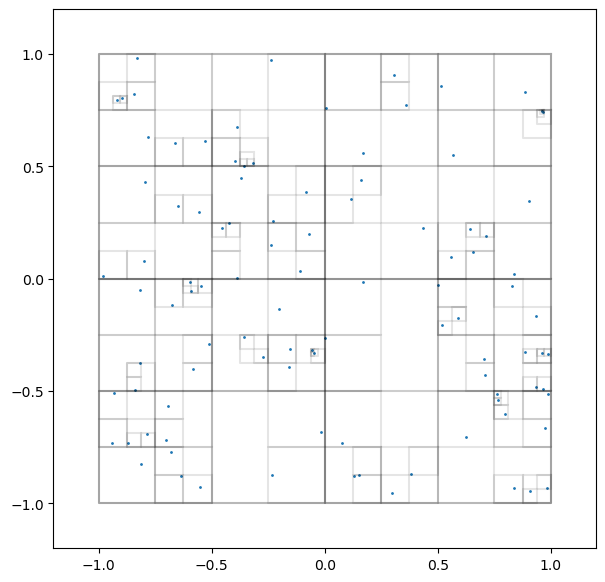

In [50]:
# random particles originally from (0, 1), scaled to (0, 2), shifted to (-1, 1)
particles = np.random.random((100, 2))  * 2 - 1

# we start with a simple leaf (root) 
root = leaf()
# which we then can immediately turn into a tree 

for p in particles: 
    root = assignParticle(p, root)
    
fig, ax = plt.subplots(figsize=(7, 7))
drawTree(root)
plt.scatter(particles[:, 0], particles[:, 1], s = 1)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
